# VOX Project: Visualizing Lyrical Symmertry

## Imports and Set-up

In [443]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd

## Function Definations

In [444]:
def extract_words(s):
    return [re.sub('^[{0}]+|[{0}]+$'.format(string.punctuation), '', w) for w in s.split()]

def diag(list1):
    return 256*np.eye(len(list1), dtype=int)

def unique_words(word_list):
    unique_list = []
    for i in word_list:
        counter = 0
        for j in word_list:
            if i == j:
                counter += 1
        if counter == 1:
            unique_list.append(i)
    return unique_list

def diff(list1, list2):
    difference = [i for i in list1 + list2 if i not in list1 or i not in list2]
    return difference

def repeated_words(difference):
    return list(set(difference))

def find_index(list1, word):
    index_num = []
    for i in range(len(list1)):
        if word == list1[i]:
            index_num.append(i)
    return index_num

def repeat_index_dict(list1, rep_words):
    dictionary = {}
    for i in rep_words:
        dictionary.update({i:find_index(list1, i)})
    return dictionary


## Reading Lyrics from File

In [445]:
file = open("lyrics.txt")
input_string = file.read().replace("\n", " ")
file.close()

input_string = input_string.lower()
List = extract_words(input_string)

## Building Lyrical Map

In [446]:
A = diag(List)
unique_list = unique_words(List)
list_diff = diff(unique_list, List)
rep_words = repeated_words(list_diff)
repeat_index = repeat_index_dict(List, rep_words)
repeat_dict = {}
sorted_repeat_dict = {}
C = np.random.randint(1, 256, size=len(rep_words))

for i in rep_words:
    repeat_dict.update({i:len(repeat_index[i])})

sorted_words = sorted(repeat_dict.items(), key=lambda x: x[1], reverse=True)

for i in sorted_words:
    sorted_repeat_dict.update({i[0]:i[1]})

for i in rep_words:
    for j in repeat_index[i]:
        for k in repeat_index[i]:
            A[j][k] = C[rep_words.index(i)]


## Defining Background and Unique Colors

In [447]:
tab20 = cm.get_cmap('tab20', 255)
newcolors = tab20(np.linspace(0, 1, 255))
bg_color = np.array([0, 0, 0, 1])
unique_color = np.array([1, 1, 1, 1])
newcolors[:1, :] = bg_color
newcolors[254:, :] = unique_color
newcmp = ListedColormap(newcolors)

## Plotting Color Map

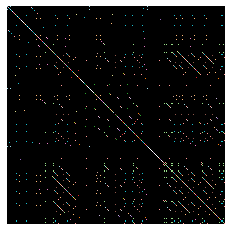

In [448]:
plt.figure()
plt.imshow(A, cmap=newcmp)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.savefig('visualization.png', dpi=1000)

## Sorted Word Count

In [454]:
df_sorted = pd.DataFrame(sorted_repeat_dict.items(), columns=['Word', 'Count'])
df_sorted

,Word,Count
0,you,29
1,the,26
2,had,24
3,me,21
4,it,20
...,...,...
58,us,2
59,reaching,2
60,fever,2
61,breathless,2
